# Exercises using Seaborn
These exercises deal with power plant data.
## Preparation
Import the relevant librarys Seaborn, matplotlib and of course pandas.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
# Display plots inside notebook
%matplotlib inline
import seaborn as sns

Now import the file *conventional_power_plants.csv* from moodle into a pandas data frame.

**Hint:** Information about the data is available from [Open Power System Data](https://data.open-power-system-data.org/conventional_power_plants/)

In [2]:
# Read dataset
df = pd.read_csv('conventional_power_plants_DE.csv', index_col=0)
df.head()

,name_bnetza,block_bnetza,name_uba,company,street,postcode,city,state,country_code,capacity_net_bnetza,...,efficiency_estimate,energy_source_level_1,energy_source_level_2,energy_source_level_3,eeg,network_node,voltage,network_operator,merge_comment,comment
id,,,,,,,,,,,,,,,,,,,,,
BNA0012a,Werkskraftwerk Sappi Alfeld,Turbine 5,NaN,Sappi Alfeld GmbH,Mühlenmarsch 1,31061,Alfeld,Niedersachsen,DE,16.0,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,6,Überlandwerk Leinetal GmbH,NaN,NaN
BNA0021,HKW Altenstadt,NaN,NaN,Heizkraftwerk Altenstadt GmbH & Co. KG,Triebstraße 90,86972,Altenstadt,Bayern,DE,9.8,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,MS,LEW Verteilnetz GmbH,NaN,NaN
BNA0027,Zellstoff Stendal GmbH,-,Arneburg,Zellstoff Stendal GmbH,Goldbecker Straße 1,39596,Arneburg,Sachsen-Anhalt,DE,138.9,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,DE0075603959600000E00000000013559 DE0075603959...,30,Infrastrukturbetrieb der Stadt Arneburg,List matching type: Single UBA power plant ass...,NaN
BNA1337b,Blockheizkraftwerk 1,Blockheizkraftwerk 1,NaN,DS Smith Paper Deutschland GmbH,Weichertstr. 7,63741,Aschaffenburg,Bayern,DE,1.1,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,20,Aschaffenburger Versorgungs GmbH,NaN,NaN
BNA1337c,Blockheizkraftwerk 2,Blockheizkraftwerk 2,NaN,DS Smith Paper Deutschland GmbH,Weichertstr. 7,63741,Aschaffenburg,Bayern,DE,0.8,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,20,Aschaffenburger Versorgungs GmbH,NaN,NaN


The available columns are found by

In [3]:
df.columns

Index(['name_bnetza', 'block_bnetza', 'name_uba', 'company', 'street',
       'postcode', 'city', 'state', 'country_code', 'capacity_net_bnetza',
       'capacity_gross_uba', 'fuel', 'technology', 'chp', 'chp_capacity_uba',
       'commissioned', 'commissioned_original', 'retrofit', 'shutdown',
       'status', 'type', 'lat', 'lon', 'eic_code_plant', 'eic_code_block',
       'efficiency_data', 'efficiency_source', 'efficiency_estimate',
       'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'eeg', 'network_node', 'voltage',
       'network_operator', 'merge_comment', 'comment'],
      dtype='object')

### Checking the time columns

In [4]:
df[['commissioned','commissioned_original', 'retrofit', 'shutdown']].head()

,commissioned,commissioned_original,retrofit,shutdown
id,,,,
BNA0012a,1988.0,1988,NaN,NaN
BNA0021,1999.0,1999,NaN,NaN
BNA0027,2004.0,2004,NaN,NaN
BNA1337b,2005.0,2005,NaN,NaN
BNA1337c,2010.0,2010,NaN,NaN


It looks like the columns `commissioned` and `commissioned_original` contain the same values, but the first one, for some reason, contains them as floats instead of intergers ...

Lets check some more ...

In [5]:
df.info('commissioned_original')

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, BNA0012a to BNA1867
Data columns (total 37 columns):
name_bnetza              806 non-null object
block_bnetza             592 non-null object
name_uba                 327 non-null object
company                  806 non-null object
street                   491 non-null object
postcode                 806 non-null object
city                     806 non-null object
state                    806 non-null object
country_code             806 non-null object
capacity_net_bnetza      781 non-null float64
capacity_gross_uba       318 non-null float64
fuel                     806 non-null object
technology               806 non-null object
chp                      805 non-null object
chp_capacity_uba         195 non-null object
commissioned             805 non-null float64
commissioned_original    806 non-null object
retrofit                 70 non-null float64
shutdown                 0 non-null float64
status                   806 non

This actually shows, that `commissioned_original` is not of type `int` either ...

In [6]:
# get rid of the data set which has no value for commissioned (805 vs. 806 from above)
df.dropna(subset=['commissioned'], inplace=True)

In [7]:
# convert column to integers (will be useful later ...)
df['commissioned']=df.commissioned.apply(lambda x:int(x))

## Excercise 1: Scatterplots

1. Create a scatterplot that shows the development of the the capacity of the german power plants over the years.

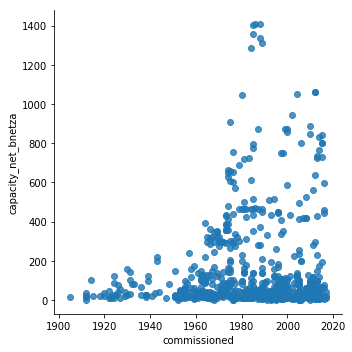

In [8]:
# Recommended way
sns.lmplot(x='commissioned', y='capacity_net_bnetza', fit_reg=False, data=df)
plt.show()

2. Change the scatterplot so that it displays the points by the type of technology they use.

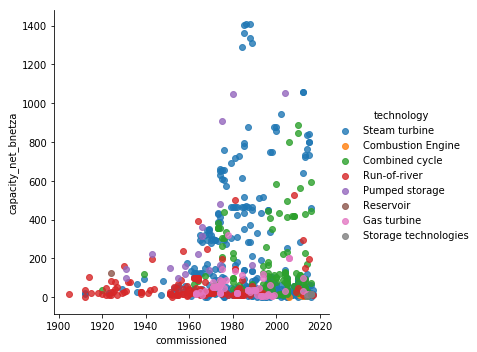

In [9]:
# Scatterplot arguments
sns.lmplot(x='commissioned', y='capacity_net_bnetza', data=df,
           fit_reg=False, # no regression line
           hue='technology',legend=True)   # color by technology
plt.show()

## Exercise 2: Boxplots
1. Create a boxplot showing the distribution of the capacity by technology and ensure that the width of the diagram is at minimum 15.

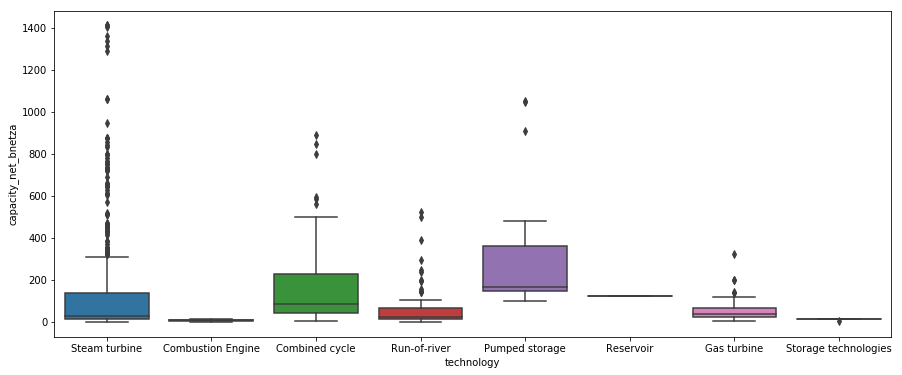

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x="technology",y="capacity_net_bnetza")
plt.show()

2. Change the type of plot from boxplot to swarmplot and ensure the following coloring
    * grey = Steam turbine
    * red = Combustion Engine
    * yellow = Combined cycle
    * blue = Run-of-river
    * light-blue = Pumped storage
    * dark blue = Reservoir
    * orange = Gas turbine
    * purple = Storage technologies
    
 You may find it useful to take a look at https://www.w3schools.com/colors/colors_picker.asp as a starting point.

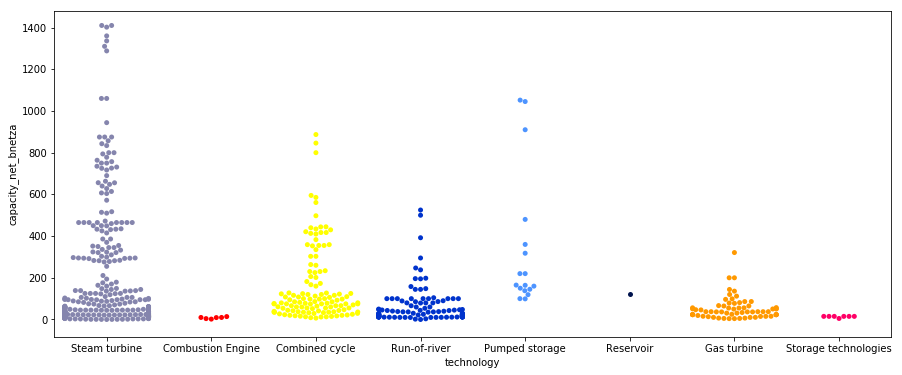

In [11]:
colors = [ '#8585ad',
         '#ff0000',
         '#ffff00',
         '#0033cc',
         '#4d94ff',
         '#00134d',
         '#ff9900',
         '#ff0066']
plt.figure(figsize=(15,6))
sns.swarmplot(data=df,x="technology",y="capacity_net_bnetza",palette=colors)
plt.show()

## Exercise 3: Barplot
1. Create a barchart showing the number of plants per year for 'Bayern'. This obviously requires some data munging with pandas.

Hints:
* Take look at the data frame method <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html">*loc*</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html">*isin*</a>.
* Also, take a look at the possible chart types of <a href="https://seaborn.pydata.org/api.html">seaborn</a>.

In [12]:
filter_df= df.loc[df['state'].isin(['Bayern'])]

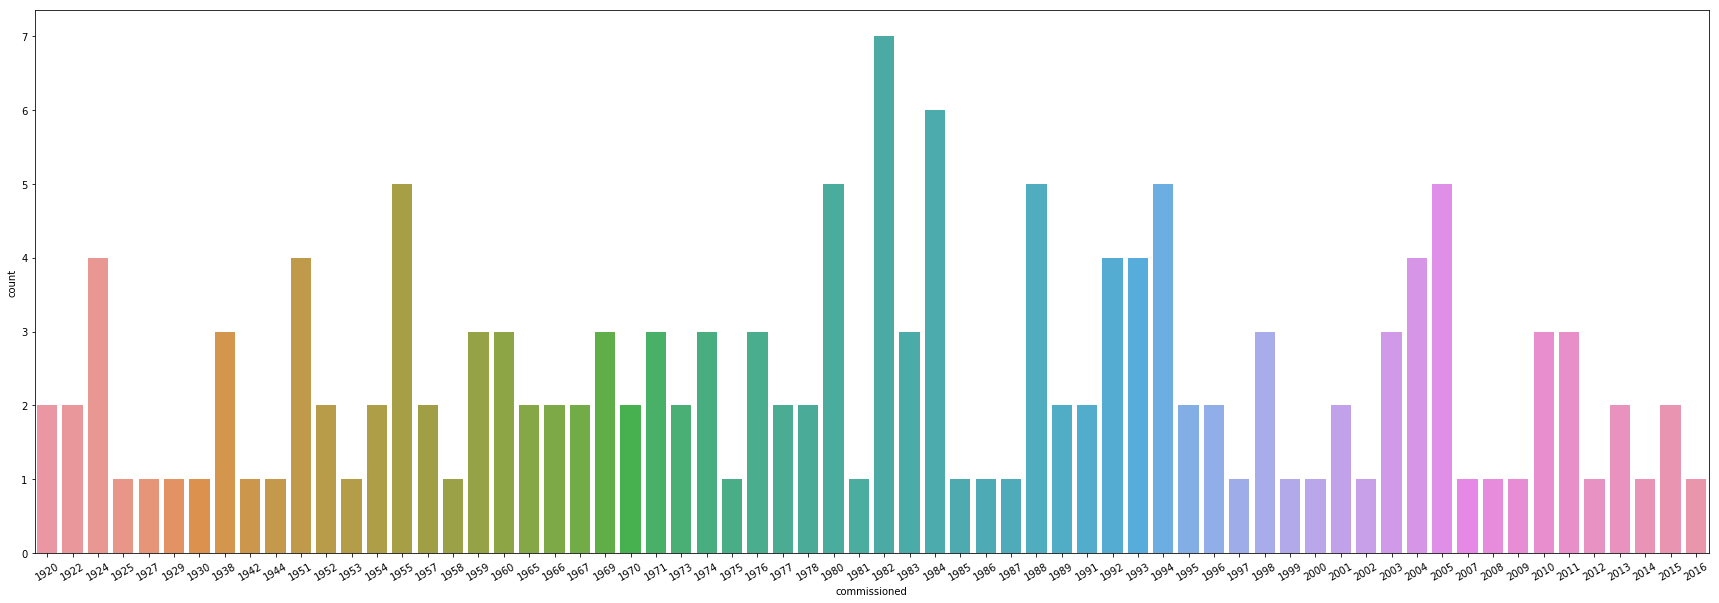

In [13]:
plt.figure(figsize=(30,10))
g = sns.countplot(x="commissioned", data=filter_df)
g.set_xticklabels(g.get_xticklabels(),rotation=30) 
plt.show()

**Remark:** If we had not converted the `commissioned`-column to integer, we would have floats for the year labels ...